千葉県船橋市の人口・世帯数マップ

In [36]:
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import contextily as cx
import folium
import pandas as pd
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')

In [37]:
gdf = gpd.read_file('funabashi.zip')

In [38]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   KEY_CODE   10023 non-null  object  
 1   PREF       10023 non-null  object  
 2   CITY       10023 non-null  object  
 3   K_AREA     10023 non-null  object  
 4   S_AREA     10023 non-null  object  
 5   PREF_NAME  10023 non-null  object  
 6   CITY_NAME  10023 non-null  object  
 7   S_NAME     10023 non-null  object  
 8   KIGO_E     0 non-null      float64 
 9   HCODE      10023 non-null  int64   
 10  AREA       10023 non-null  float64 
 11  PERIMETER  10023 non-null  float64 
 12  KIHON1     10023 non-null  object  
 13  DUMMY1     10023 non-null  object  
 14  KIHON2     10023 non-null  object  
 15  KIHON3     10023 non-null  object  
 16  C1         10023 non-null  int64   
 17  C2         10023 non-null  int64   
 18  DUMMY2     10023 non-null  object  
 19  C3         10023 

In [39]:
gdf.head()

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,122040001101,12,204,008002070,0001101,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040001-1-01,23,16,12,204,139.980933,35.696626,0080-02070,1-1- 1,"POLYGON ((139.98134 35.69699, 139.98120 35.696..."
1,122040001102,12,204,008002080,0001102,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040001-1-02,29,19,12,204,139.981807,35.695081,0080-02080,1-1- 2,"POLYGON ((139.98114 35.69628, 139.98102 35.696..."
2,122040001103,12,204,008002090,0001103,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040001-1-03,0,0,12,204,139.982662,35.694926,0080-02090,1-1- 3,"POLYGON ((139.98322 35.69480, 139.98312 35.694..."
3,122040001104,12,204,008002100,0001104,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040001-1-04,0,0,12,204,139.982290,35.694317,0080-02100,1-1- 4,"POLYGON ((139.98312 35.69462, 139.98269 35.694..."
4,1220400021,12,204,008002080,00021,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040002-1-00,200,81,12,204,139.980825,35.695706,0080-02080,2-1,"POLYGON ((139.98100 35.69577, 139.98094 35.695..."


In [40]:
gdf=gdf.to_crs(3857)

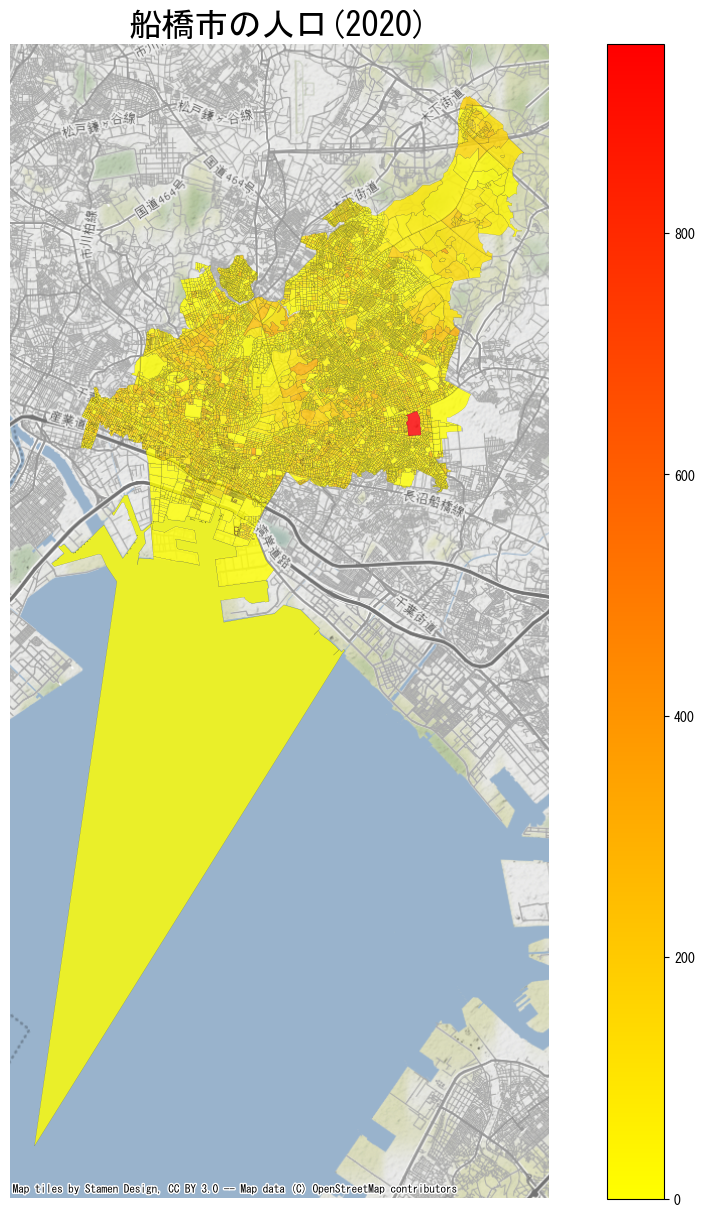

In [41]:
# population map
ax = gdf.plot(figsize=(15,15),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('船橋市の人口(2020)',fontsize=24)

# add basemap
cx.add_basemap(ax)

↑海も船橋市になっている、、、

In [42]:
gdf = gdf.sort_values(by='JINKO', ascending=False )
gdf.head(10)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
8793,1220441286,12,204,071003200,41286,千葉県,船橋市,薬円台三丁目,NaN,8101,...,2044128-6-00,957,27,12,204,140.052095,35.709025,0710-03200,4128-6,"POLYGON ((15590676.107 4261137.222, 15590725.9..."
444,1220402744,12,204,003003030,02744,千葉県,船橋市,市場三丁目,NaN,8101,...,2040274-4-00,340,1,12,204,139.997677,35.701031,0030-03030,274-4,"POLYGON ((15584454.002 4259737.180, 15584505.8..."
5612,1220427574,12,204,092000070,27574,千葉県,船橋市,金堀町,NaN,8101,...,2042757-4-00,334,4,12,204,140.062708,35.756806,0920-00070,2757-4,"POLYGON ((15591720.528 4267303.144, 15591836.3..."
1972,1220412251,12,204,022002170,12251,千葉県,船橋市,西船二丁目,NaN,8101,...,2041225-1-00,308,95,12,204,139.967068,35.713456,0220-02170,1225-1,"POLYGON ((15581013.184 4261282.480, 15581028.1..."
1082,1220406211,12,204,006002030,06211,千葉県,船橋市,浜町二丁目,NaN,8101,...,2040621-1-00,306,96,12,204,139.991340,35.679206,0060-02030,621-1,"POLYGON ((15583781.206 4256581.553, 15583782.6..."
5320,1220426261,12,204,055002100,26261,千葉県,船橋市,三咲二丁目,NaN,8101,...,2042626-1-00,302,146,12,204,140.030283,35.751850,0550-02100,2626-1,"POLYGON ((15588196.240 4266542.355, 15588189.2..."
7748,1220435731,12,204,084006030,35731,千葉県,船橋市,習志野台六丁目,NaN,8101,...,2043573-1-00,302,103,12,204,140.049324,35.727114,0840-06030,3573-1,"POLYGON ((15590255.959 4263174.557, 15590240.0..."
7554,1220434521,12,204,084002600,34521,千葉県,船橋市,習志野台二丁目,NaN,8101,...,2043452-1-00,300,91,12,204,140.047611,35.728173,0840-02600,3452-1,"POLYGON ((15590164.969 4263200.319, 15590101.9..."
9795,1220445671,12,204,063006010,45671,千葉県,船橋市,前原西六丁目,NaN,8101,...,2044567-1-00,297,105,12,204,140.023258,35.703824,0630-06010,4567-1,"POLYGON ((15587351.487 4259997.083, 15587368.8..."
1071,1220406101,12,204,006002030,06101,千葉県,船橋市,浜町二丁目,NaN,8101,...,2040610-1-00,295,93,12,204,139.991212,35.680335,0060-02030,610-1,"POLYGON ((15583767.594 4256736.502, 15583768.3..."


In [51]:
fig = px.bar(gdf.head(10),
            y='JINKO',
            x='S_NAME',
            template='seaborn')

fig.show()

↑ 浜松二丁目が二つ重なっている、、、

In [44]:
df = pd.read_csv('20230614.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         9 non-null      object 
 1   description  9 non-null      object 
 2   latitude     9 non-null      float64
 3   longitude    9 non-null      float64
 4   color        9 non-null      object 
dtypes: float64(2), object(3)
memory usage: 492.0+ bytes


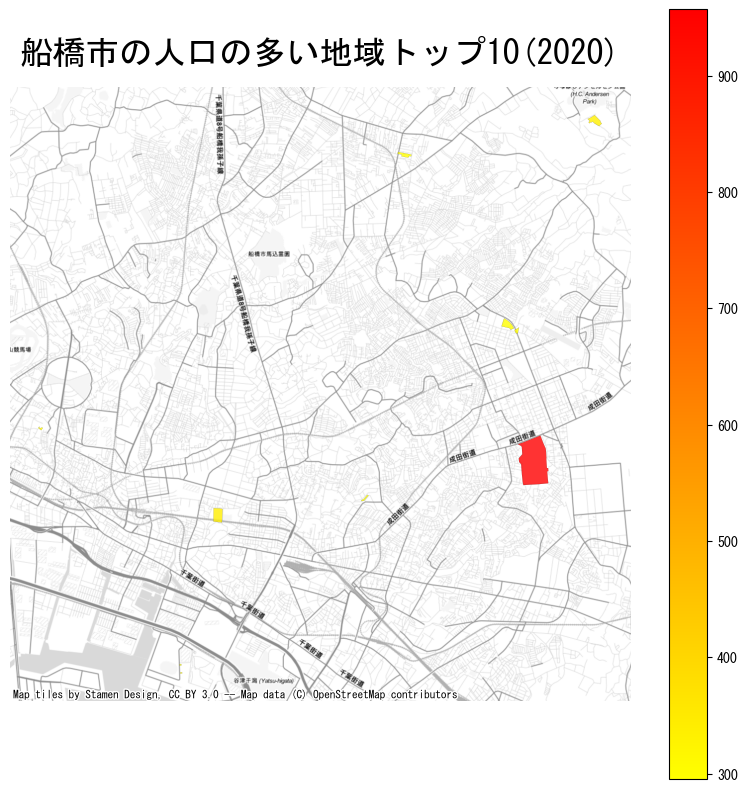

In [45]:
# population map
ax = gdf.head(10).plot(figsize=(10,10),
         column='JINKO',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('船橋市の人口の多い地域トップ10(2020)',fontsize=24)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)



In [46]:
# get center lat/lon
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=17)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:150px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['color']
                )).add_to(m)
    

# make the map
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=12,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, popup='<div style="width:150px">'+row['description']+'</div>', tooltip=row['name'],icon=folium.Icon(color=row['color'])).add_to(m)

# show the map
m

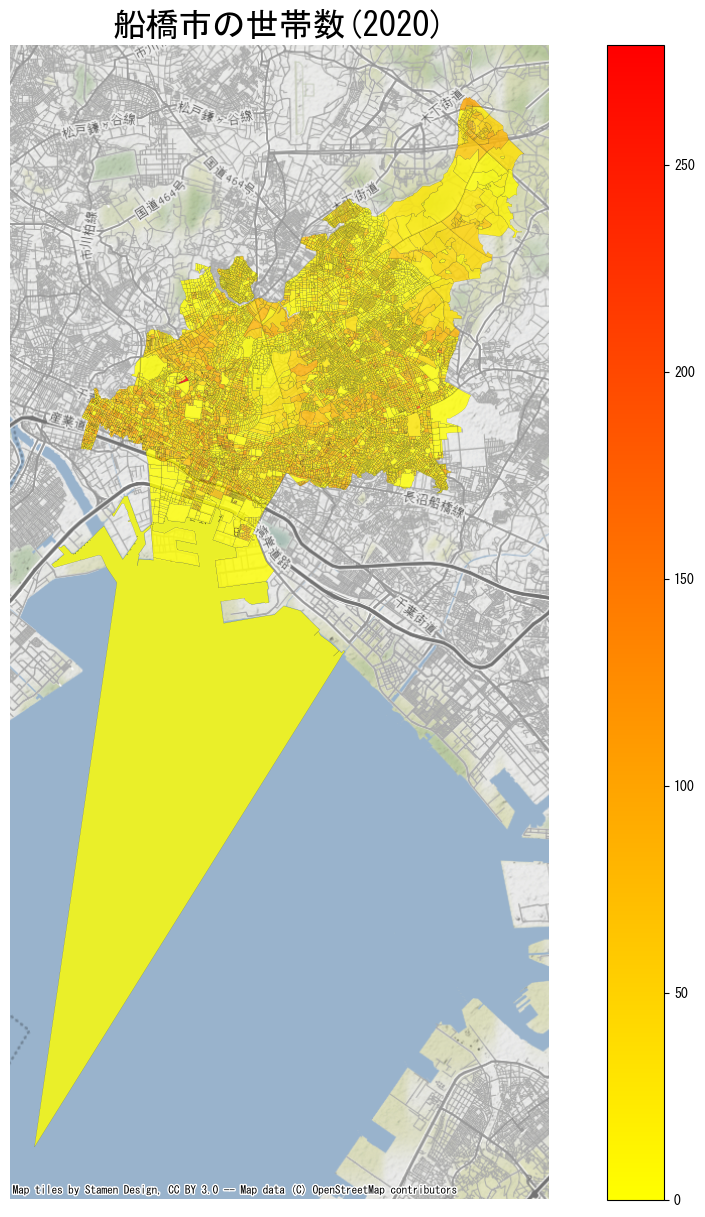

In [47]:
# population map
ax = gdf.plot(figsize=(15,15),
         column='SETAI',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('船橋市の世帯数(2020)',fontsize=24)

# add basemap
cx.add_basemap(ax)

In [48]:
gdf = gdf.sort_values(by='SETAI', ascending=False )
gdf.head(10)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
3230,1220419468,12,204,038002060,19468,千葉県,船橋市,行田二丁目,NaN,8101,...,2041946-8-00,279,279,12,204,139.974753,35.721437,0380-02060,1946-8,"POLYGON ((15581906.793 4262488.212, 15581926.0..."
7970,122043694101,12,204,084004830,3694101,千葉県,船橋市,習志野台四丁目,NaN,8101,...,2043694-1-01,212,188,12,204,140.053855,35.713765,0840-04830,3694-1- 1,"POLYGON ((15590733.898 4261269.739, 15590672.0..."
5320,1220426261,12,204,055002100,26261,千葉県,船橋市,三咲二丁目,NaN,8101,...,2042626-1-00,302,146,12,204,140.030283,35.751850,0550-02100,2626-1,"POLYGON ((15588196.240 4266542.355, 15588189.2..."
9620,122044445101,12,204,062004170,4445101,千葉県,船橋市,前原東四丁目,NaN,8101,...,2044445-1-01,159,144,12,204,140.028914,35.700286,0620-04170,4445-1- 1,"POLYGON ((15588032.864 4259443.634, 15588006.3..."
1518,1220408871,12,204,028000160,08871,千葉県,船橋市,本郷町,NaN,8101,...,2040887-1-00,144,130,12,204,139.955362,35.708609,0280-00160,887-1,"POLYGON ((15579806.561 4260629.360, 15579816.5..."
5971,122042844101,12,204,095103130,2844101,千葉県,船橋市,坪井東三丁目,NaN,8101,...,2042844-1-01,187,129,12,204,140.060934,35.729106,0951-03130,2844-1- 1,"POLYGON ((15591486.586 4263485.290, 15591517.4..."
3326,1220420021,12,204,024002060,20021,千葉県,船橋市,印内二丁目,NaN,8101,...,2042002-1-00,211,129,12,204,139.960856,35.715546,0240-02060,2002-1,"POLYGON ((15580383.878 4261576.785, 15580400.5..."
3307,1220419868,12,204,024002090,19868,千葉県,船橋市,印内二丁目,NaN,8101,...,2041986-8-00,126,125,12,204,139.964430,35.717272,0240-02090,1986-8,"POLYGON ((15580825.748 4261798.065, 15580800.7..."
531,1220403211,12,204,005001050,03211,千葉県,船橋市,駿河台一丁目,NaN,8101,...,2040321-1-00,214,120,12,204,140.006616,35.703930,0050-01050,321-1,"POLYGON ((15585542.418 4259987.965, 15585554.2..."
49,1220400321,12,204,008002120,00321,千葉県,船橋市,湊町二丁目,NaN,8101,...,2040032-1-00,143,118,12,204,139.983196,35.693687,0080-02120,32-1,"POLYGON ((15582956.904 4258659.181, 15582853.4..."


In [49]:
fig = px.bar(gdf.head(10),
            y='SETAI',
            x='S_NAME',
            template='seaborn')

fig.show()

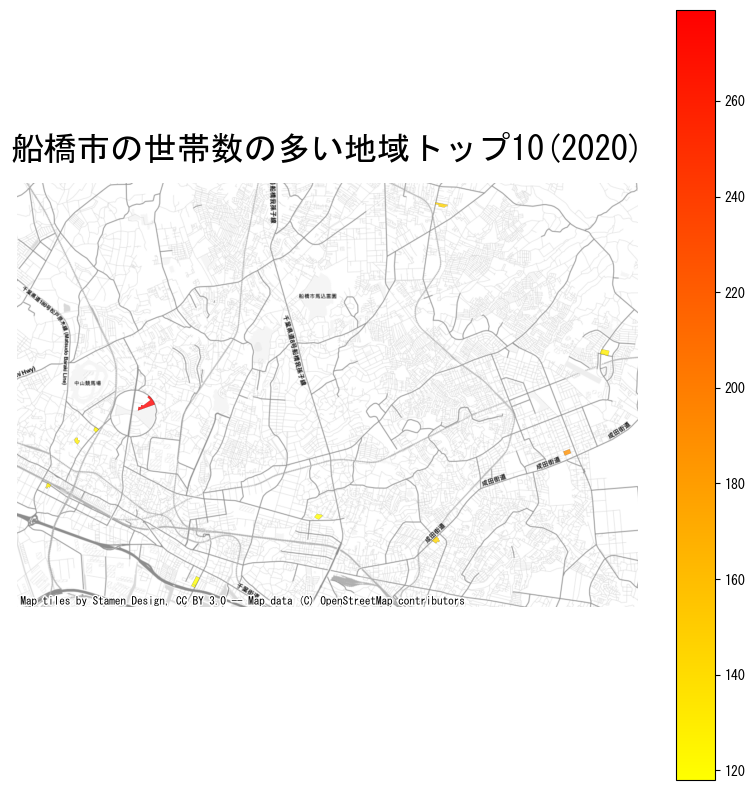

In [50]:
# population map
ax = gdf.head(10).plot(figsize=(10,10),
         column='SETAI',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.08,
         alpha=0.8)

# hide axes
ax.axis('off')

# title
ax.set_title('船橋市の世帯数の多い地域トップ10(2020)',fontsize=24)

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

感想
マップに海上が含まれてしまっていたり、同じ地域なのに複数のデータがあったりしたのでそれを直すことができたらもっと見やすく正確なマップになったと思うので方法が知りたい。トップ１０のマップにマーカーをつけたり、説明をつけられたらわかりやすいと思った。
私は20年ほど船橋市に住んでいるが、船橋市についてほとんど知らないので、今回人口という観点から船橋市を見ることができて、少しは地元に詳しくなれたかなと思う。